# Parte 1 – Preparação dos dados

### 1.1 Carregamento dos dados

In [218]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuração de estilo para gráficos
sns.set(style="whitegrid")

# 1.1 Carregamento dos dados
ideb_df = pd.read_csv("br_inep_ideb_uf.csv")
pib_df = pd.read_csv("br_ibge_pib_uf.csv")
pop_df = pd.read_csv("br_ibge_populacao_uf.csv")

### 1.2 Filtro dos dados de interesse no IDEB

In [219]:
# Selecionar apenas os dados do ensino médio da rede total
ideb_filtered = ideb_df[
    (ideb_df["rede"] == "total") & 
    (ideb_df["ensino"] == "medio") & 
    (ideb_df["anos_escolares"] == "todos (1-4)")
][["ano", "sigla_uf", "ideb"]].copy()

### 1.3 Agregação do PIB por estado e ano

In [220]:
# 1.3 Agregação do PIB por estado e ano
pib_df["uf"] = pib_df["id_uf"].astype(str).str[:2]
pib_uf = pib_df.groupby(["uf", "ano"], as_index=False)["pib"].sum().rename(columns={"pib": "pib_total_uf"})

### 1.4 Mapeamento dos códigos de UF

In [221]:
# Mapeamento dos códigos UF para siglas
uf_map = {
    "11": "RO", "12": "AC", "13": "AM", "14": "RR", "15": "PA", "16": "AP", "17": "TO",
    "21": "MA", "22": "PI", "23": "CE", "24": "RN", "25": "PB", "26": "PE", "27": "AL", "28": "SE", "29": "BA",
    "31": "MG", "32": "ES", "33": "RJ", "35": "SP",
    "41": "PR", "42": "SC", "43": "RS",
    "50": "MS", "51": "MT", "52": "GO", "53": "DF"
}
pib_uf["sigla_uf"] = pib_uf["uf"].map(uf_map)

### 1.5 cálculo do PIB per capita com Merge

In [222]:
pib_simplificado = pib_df[pib_df["ano"] == 2019][["ano", "sigla_uf", "pib"]]
pop_simplificado = pop_df[pop_df["ano"] == 2019][["ano", "sigla_uf", "populacao"]]
pib_per_capita_df = pd.merge(pib_simplificado, pop_simplificado, on=["ano", "sigla_uf"], how="inner")
pib_per_capita_df["pib_per_capita"] = pib_per_capita_df["pib"] / pib_per_capita_df["populacao"]

# Parte 2 - Merge Dos Dados

### 2.1 Merge dos dados de PIB per capita e IDEB

In [223]:
analise_df = pd.merge(pib_per_capita_df, ideb_filtered, on=["ano", "sigla_uf"], how="inner")
analise_df = pd.merge(analise_df, pib_uf[["ano", "sigla_uf", "pib_total_uf"]], on=["ano", "sigla_uf"], how="inner")

# Parte 3 – Análise e visualização dos dados

### 3.1 Boxplot do PIB por estado

C:\Users\gabri\AppData\Local\Temp\ipykernel_27772\2118238271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


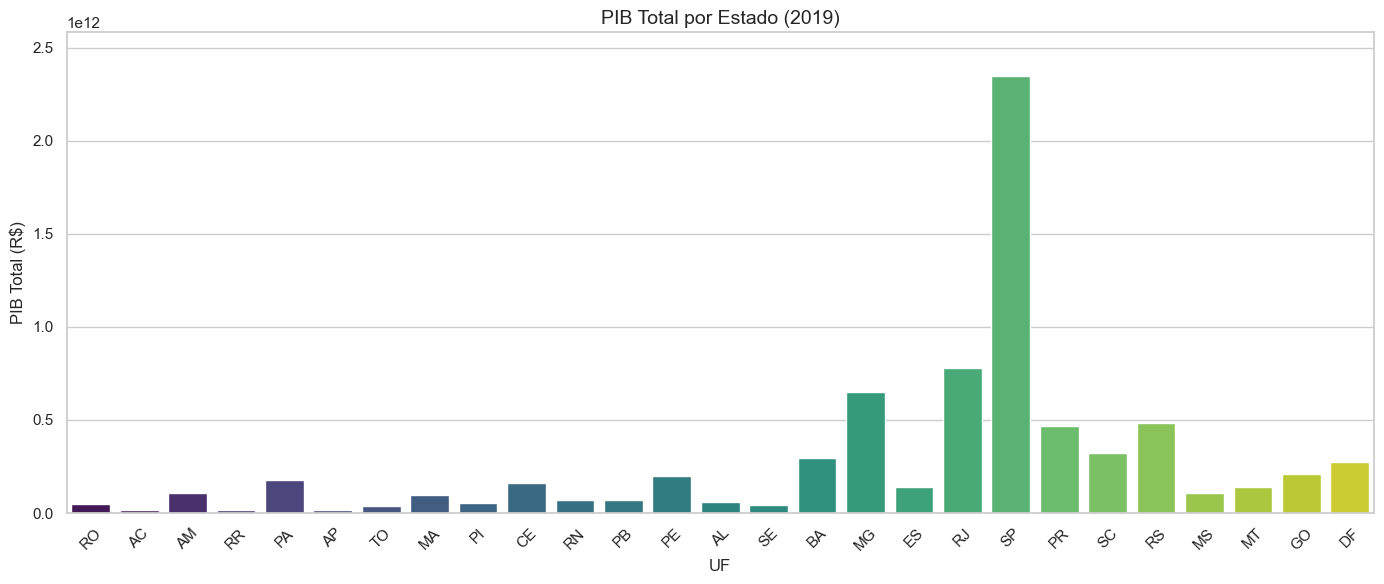

In [224]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=pib_uf[pib_uf["ano"] == 2019], x="sigla_uf", y="pib_total_uf",palette="viridis"
)
plt.title("PIB Total por Estado (2019)", fontsize=14)
plt.xlabel("UF", fontsize=12)
plt.ylabel("PIB Total (R$)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, pib_uf[pib_uf["ano"] == 2019]["pib_total_uf"].max() * 1.1)
plt.tight_layout()
plt.show()


### 3.2 Gráfico da População Estadual

C:\Users\gabri\AppData\Local\Temp\ipykernel_27772\3694005878.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'População')

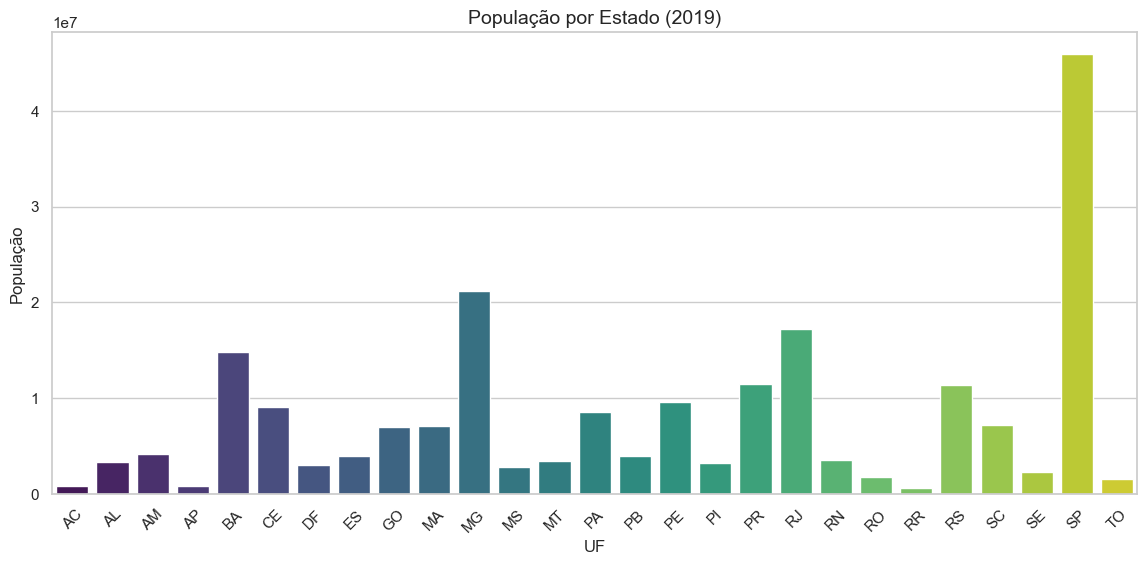

In [225]:
# Gráfico
pop_2019 = pop_df[pop_df["ano"] == 2019]
plt.figure(figsize=(14, 6))
sns.barplot(
    data=pop_2019, x="sigla_uf", y="populacao", palette="viridis"
)
plt.xticks(rotation=45)
plt.title("População por Estado (2019)", fontsize=14)
plt.xlabel("UF", fontsize=12)
plt.ylabel("População", fontsize=12)

### 3.3 Gráfico do PIB per Capita por Estado

C:\Users\gabri\AppData\Local\Temp\ipykernel_27772\3702055847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


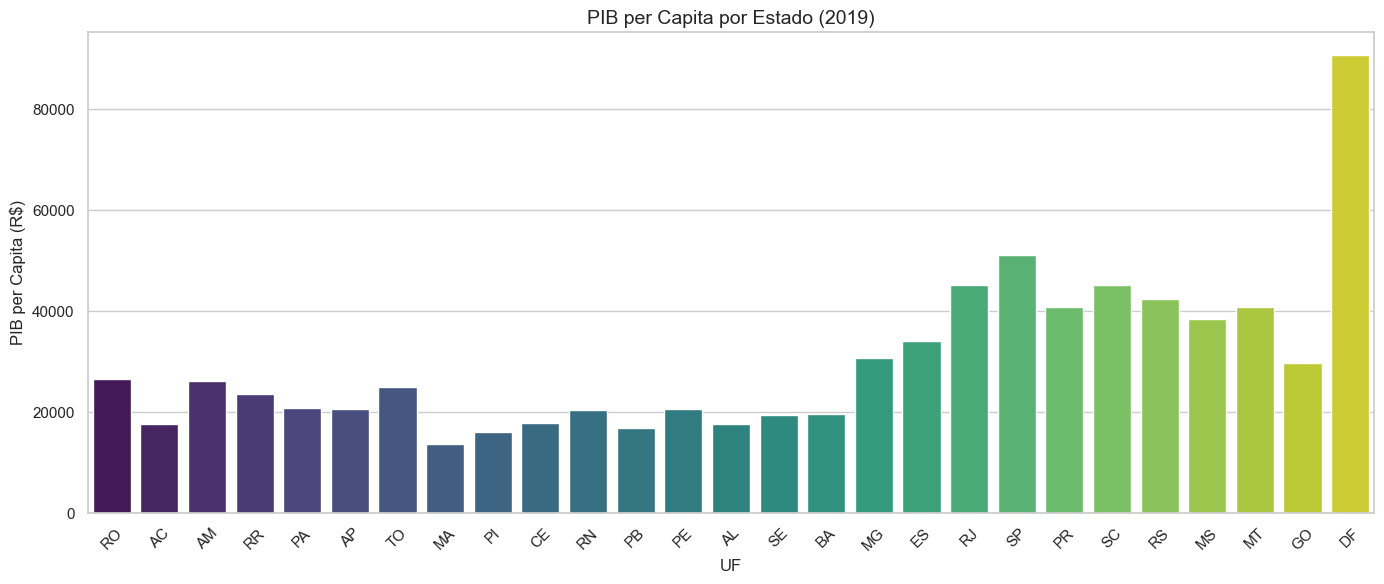

In [226]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=pib_per_capita_df, x="sigla_uf", y="pib_per_capita", palette="viridis"
)
plt.xticks(rotation=45)
plt.title("PIB per Capita por Estado (2019)", fontsize=14)
plt.ylabel("PIB per Capita (R$)", fontsize=12)
plt.xlabel("UF", fontsize=12)
plt.tight_layout()
plt.show()


### 3.4 PIB per capita vs IDEB

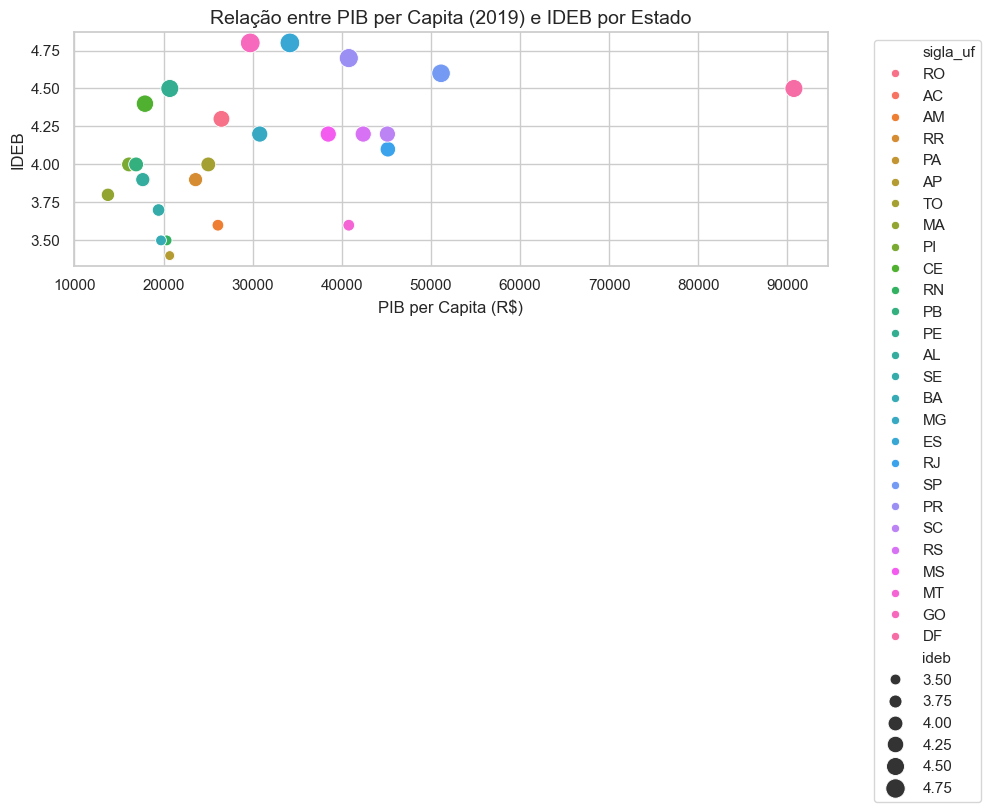

In [227]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analise_df, x="pib_per_capita", y="ideb", hue="sigla_uf", size="ideb", sizes=(50, 200))
plt.title("Relação entre PIB per Capita (2019) e IDEB por Estado", fontsize=14)
plt.xlabel("PIB per Capita (R$)", fontsize=12)
plt.ylabel("IDEB", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### 3.5 Correlação entre PIB per capita e IDEB

In [228]:
correlation = analise_df[["pib_per_capita", "ideb"]].corr().iloc[0, 1]
print(f"Correlação entre PIB per capita e IDEB: {correlation:.2f}")

Correlação entre PIB per capita e IDEB: 0.45


### 3.6 Estatísticas Descritivas

In [229]:
print("\nEstatísticas descritivas do IDEB por estado:")
print(analise_df.groupby("sigla_uf")["ideb"].describe())
print("\nEstatísticas descritivas do PIB per capita por estado:")
print(analise_df.groupby("sigla_uf")["pib_per_capita"].describe())


Estatísticas descritivas do IDEB por estado:
          count  mean  std  min  25%  50%  75%  max
sigla_uf                                           
AC          1.0   3.9  NaN  3.9  3.9  3.9  3.9  3.9
AL          1.0   3.9  NaN  3.9  3.9  3.9  3.9  3.9
AM          1.0   3.6  NaN  3.6  3.6  3.6  3.6  3.6
AP          1.0   3.4  NaN  3.4  3.4  3.4  3.4  3.4
BA          1.0   3.5  NaN  3.5  3.5  3.5  3.5  3.5
CE          1.0   4.4  NaN  4.4  4.4  4.4  4.4  4.4
DF          1.0   4.5  NaN  4.5  4.5  4.5  4.5  4.5
ES          1.0   4.8  NaN  4.8  4.8  4.8  4.8  4.8
GO          1.0   4.8  NaN  4.8  4.8  4.8  4.8  4.8
MA          1.0   3.8  NaN  3.8  3.8  3.8  3.8  3.8
MG          1.0   4.2  NaN  4.2  4.2  4.2  4.2  4.2
MS          1.0   4.2  NaN  4.2  4.2  4.2  4.2  4.2
MT          1.0   3.6  NaN  3.6  3.6  3.6  3.6  3.6
PA          1.0   3.4  NaN  3.4  3.4  3.4  3.4  3.4
PB          1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
PE          1.0   4.5  NaN  4.5  4.5  4.5  4.5  4.5
PI          1.0   

# Parte 4 – Insights


## Parte 4: Insights


- **Estados que se destacam positivamente**:
  - Estados como **GO (Goiás)** e **PR (Paraná)** se destacam positivamente por apresentarem índices de IDEB elevados, mesmo com um PIB per capita intermediário. Isso sugere uma gestão educacional eficiente e boa aplicação dos recursos disponíveis.

- **Estados que se destacam negativamente**:
  - Alguns estados da região Norte, como **AM (Amazonas)** e **AC (Acre)**, apresentam tanto PIB per capita quanto IDEB abaixo da média, indicando desafios estruturais mais amplos, que vão além da economia, incluindo questões de acesso, infraestrutura e políticas públicas locais.

- **Outros fatores**: A dispersão dos pontos no gráfico indica que o desempenho educacional depende de múltiplos fatores, entre eles:

  - Políticas públicas consistentes;
  - Qualificação e valorização dos professores;
  - Eficiência na gestão escolar;
  - Investimentos estratégicos em infraestrutura educacional e apoio pedagógico.

- **Conclusão**: O PIB estadual pode fornecer os meios, mas não garante por si só os fins educacionais. Estados com menor renda podem alcançar bons resultados se houver priorização da educação, planejamento eficaz e governança qualificada.